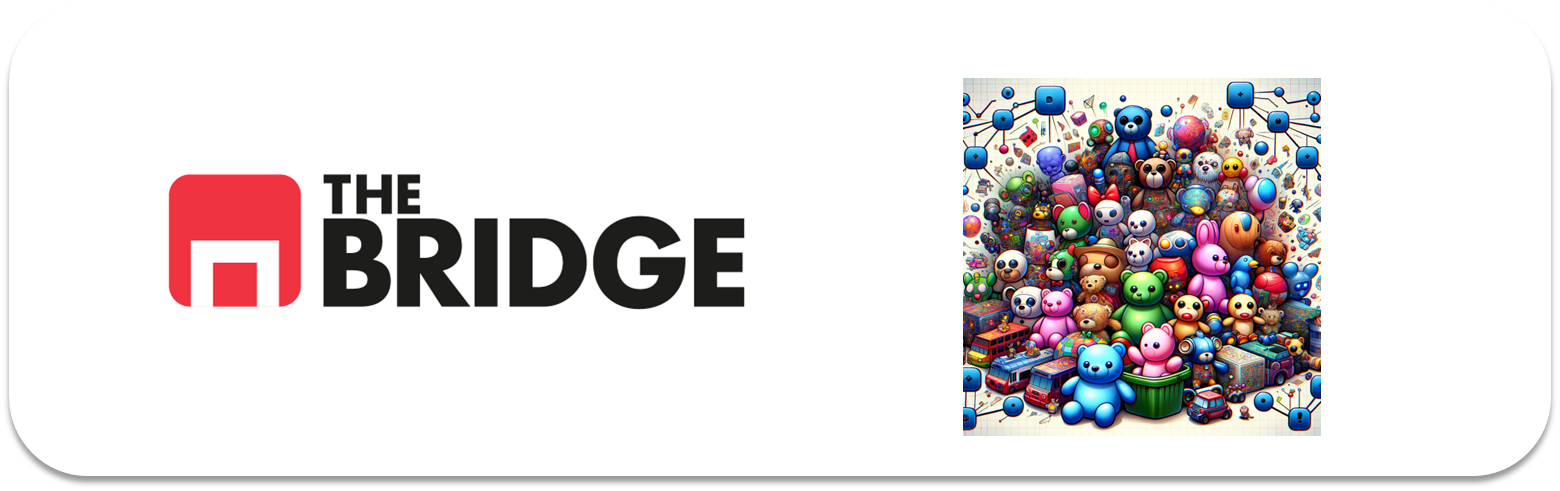

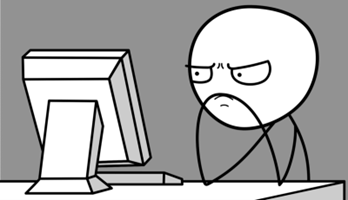

## PRACTICA OBLIGATORIA: DBSCAN y CLUSTERING JERARQUICO

* La práctica obligatoria de esta unidad consiste en un ejercicio de modelado no supervisado aplicado a clustering jerárquico y no jerárquico. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist
import scipy.cluster.hierarchy as sch


### Parte I. Modelado

#### Descripción del problema.

En una planta de experimentación con nuevas bebidas energéticas están trabajando con diferentes mezclas de componentes para obtener posibles variedades de su producto estrella "NonstopU". El problema es que la fabricación de cada "prototipo" conlleva demasiado tiempo y las pruebas de sabores y de propiedades "non-stop" antisueño y antifatiga son costosas.  

En ese sentido quieren construir algún sistema de segmentación previa de mezclas sin probarlas solo indicando las cantidades de cada componente de la bebida. Tienen datos pero desgraciadamente de mezclas anteriores con diferentes medidas pero que por temas presupuestarios y de prioridad no se hicieron test con usuarios y potenciales clientes, es decir no tienen un target de capacidad antifatiga o de preferncia del usuario que puedas servirles para construir un clasificador clásico como han hecho otras veces.  

Han acudido a vosotros con la necesida de encontrar ese segmentador de posibles bebidas y con los datos de las mezclas no probadas anteriores por ver si vostros podéis ayudarles a encontrar algún tipo de segmentación que luego ello se encargarían de interpretar. No es requisito obligatorio pero les gustaría también poder establecer algún tipo de relación entre las segmentaciones (tipo cuales segmentos se "parecerían" más entre sí)

NOTA ORIENTATIVA: Los químicos no esperan que haya menos de 3 segmentos ni más de 5.  
NOTA OPERATIVA: El dataset con los datos que nos han dado los químicos está en "./data/empowering_drinks.csv"

**Se pide**: Construir al menos dos algoritmos de clustering (DBSCAN debe ser uno de ellos y el otro debería estar claro cual deberíamos usar dado el enunciado). Compararlos brevemente aunque sea meramente especulativo (¿Por qué es espculativo?)

**Se recomienda**: Visualizar las features dos a dos para escoger las mejores, no necesariamente hay que usar todas, ni tampoco quedarse en dos. Probar diferentes hiperparámetros en función de la nota orientativa y explicar porqué se han escogido los que finalmente se hayan escogido. 

Recuerda que el proceso es similar a lo que vimos en el otro tipo de aprendizaje:
1. Entender el problema
2. Cargar datos, visualizar.
3. MiniEDA: Selección de features
4. Tratamiento de Features.
5. Selección de modelos, selección de hiperparámetros
6. Entrenamiento, visualización de resultados.
7. Discusión de los mismos


In [13]:
# Cargar datos
df = pd.read_csv("./data/empowering_drinks.csv", delimiter="|")  # Ajustando el delimitador

# Verificar tipos de datos y convertir a numérico
df = df.apply(pd.to_numeric, errors='coerce')
df.dropna(inplace=True)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Azúcares               153 non-null    float64
 1   Vitamínas del grupo B  153 non-null    float64
 2   Cafeína                153 non-null    float64
 3   Ácido Cítrico          153 non-null    float64
 4   Taurina                153 non-null    float64
dtypes: float64(5)
memory usage: 6.1 KB


In [14]:
df.head()

,Azúcares,Vitamínas del grupo B,Cafeína,Ácido Cítrico,Taurina
0,1.518613,0.232053,1.034819,1.013009,0.251717
1,0.246290,-0.827996,0.733629,0.965242,-0.293321
2,0.196879,1.109334,1.215533,1.395148,0.269020
3,1.691550,0.487926,1.466525,2.334574,1.186068
4,0.295700,1.840403,0.663351,-0.037874,-0.319276


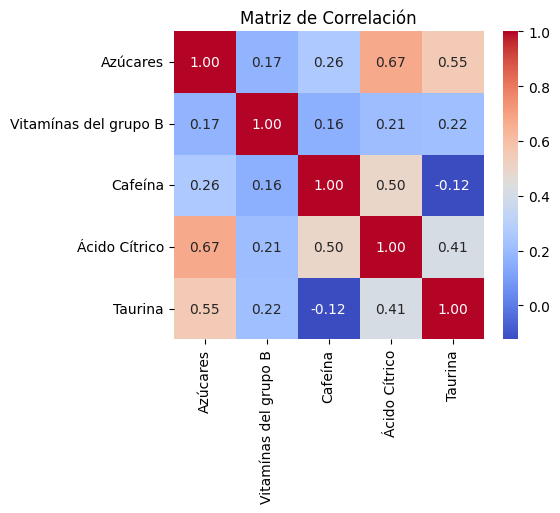

In [6]:
# Visualización inicial: Matriz de correlación
plt.figure(figsize=(5, 4))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

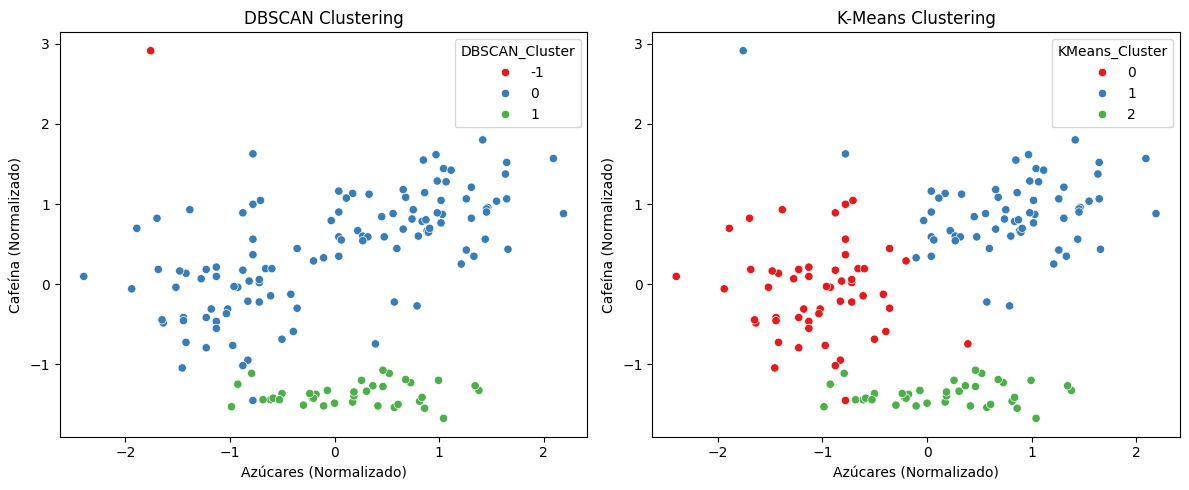

Silhouette Score K-Means: 0.5039167432835728
Silhouette Score DBSCAN: 0.38200366662668966


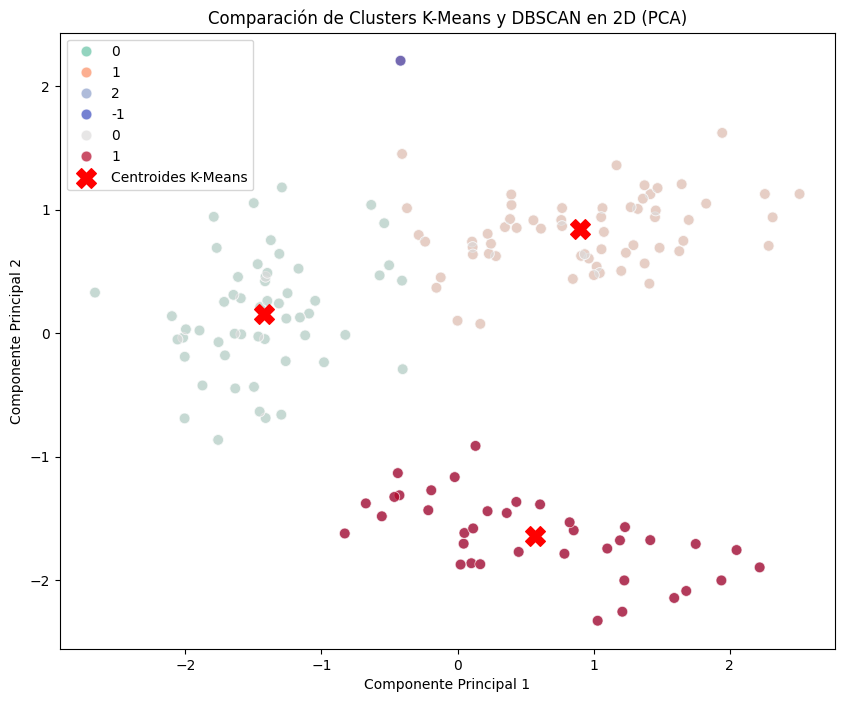


 Resumen de muestras por cluster en K-Means:
KMeans_Cluster
1    62
0    54
2    37

 Resumen de muestras por cluster en DBSCAN:
DBSCAN_Cluster
 0    115
 1     37
-1      1

 Promedio de características por cluster en K-Means:
                Azúcares  Cafeína  Taurina
KMeans_Cluster                            
0                 -1.041   -0.070   -0.960
1                  0.839    0.987    0.171
2                  0.193   -1.383    0.933

 Número de outliers detectados por DBSCAN: 1


In [25]:
# Selección de características relevantes
selected_features = ["Azúcares", "Cafeína", "Taurina"]
X = df[selected_features]

# Normalización de los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

# Aplicar K-Means con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

# Visualización de clusters
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
for ax, (model, cluster_column, title) in zip(axes, [
    (dbscan, 'DBSCAN_Cluster', "DBSCAN Clustering"),
    (kmeans, 'KMeans_Cluster', "K-Means Clustering")
]):
    sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=df[cluster_column], palette="Set1", ax=ax, legend='full')
    ax.set_title(title)
    ax.set_xlabel("Azúcares (Normalizado)")
    ax.set_ylabel("Cafeína (Normalizado)")
plt.tight_layout()
plt.show()

# Comparación de resultados con Silhouette Score
silhouette_kmeans = silhouette_score(X_scaled, df['KMeans_Cluster'])
silhouette_dbscan = silhouette_score(X_scaled[df['DBSCAN_Cluster'] != -1], df['DBSCAN_Cluster'][df['DBSCAN_Cluster'] != -1]) if len(set(df['DBSCAN_Cluster'])) > 1 else "No calculable"
print(f"Silhouette Score K-Means: {silhouette_kmeans}")
print(f"Silhouette Score DBSCAN: {silhouette_dbscan}")

# Realizar PCA para reducir la dimensionalidad a 2D
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X_scaled)  # X_scaled: datos escalados

# Graficar los puntos y los centroides
plt.figure(figsize=(10, 8))

# Graficar los puntos de K-Means
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=df['KMeans_Cluster'], palette="Set2", s=60, alpha=0.7)

# Graficar los puntos de DBSCAN (solo los puntos no ruidosos)
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=df['DBSCAN_Cluster'], palette="coolwarm", s=60, alpha=0.7, marker="o")

# Graficar los centroides de K-Means
centroids = kmeans.cluster_centers_
centroids_reduced = pca.transform(centroids)  # Reducir a 2D usando PCA
plt.scatter(centroids_reduced[:, 0], centroids_reduced[:, 1], c='red', marker='X', s=200, label="Centroides K-Means")

# Ajustar visualización
plt.title("Comparación de Clusters K-Means y DBSCAN en 2D (PCA)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend()
plt.show()

#  Resumen y análisis de resultados
# Resumen de muestras por cluster en K-Means
print("\n Resumen de muestras por cluster en K-Means:")
print(df["KMeans_Cluster"].value_counts().to_string())

# Resumen de muestras por cluster en DBSCAN
print("\n Resumen de muestras por cluster en DBSCAN:")
print(df["DBSCAN_Cluster"].value_counts().to_string())

# Promedio de características por cluster en K-Means
print("\n Promedio de características por cluster en K-Means:")
print(df.groupby("KMeans_Cluster")[selected_features].mean().round(3).to_string())

# Número de outliers detectados por DBSCAN
outliers_dbscan = (df['DBSCAN_Cluster'] == -1).sum()
print(f"\n Número de outliers detectados por DBSCAN: {outliers_dbscan}")

### Parte II. Nuevos experimentos

Los químicos están muy esperanzados con los modelos que les habéis mostrado y os pasan una lista de nuevos experimentos para que los clasifiquéis. Emplea uno de los modelos construidos, el que te resulte más sencillo, para segmentar los nuevos experimentos que puedes encontrar en "./data/new_experiments.csv"

In [15]:
# Cargar los nuevos experimentos
file_path = "./data/new_experiments.csv"
new_experiments = pd.read_csv(file_path)

# Ver las primeras filas para entender la estructura
new_experiments.head()

,Azúcares|Vitamínas del grupo B|Cafeína|Ácido Cítrico|Taurina
0,1.481554592038443|0.3051593592196358|1.3661279...
1,0.6168691165220721|0.8900139050187754|0.583033...
2,-1.6807237184214292|0.3417127683320813|-0.3406...
3,-0.2848743079450018|-1.4128508690653407|-0.782...
4,-0.9272120897571632|0.6341400412316519|-1.5654...


In [16]:
# Cargar nuevamente el archivo con el separador correcto
new_experiments = pd.read_csv(file_path, sep="|")

# Ver las primeras filas corregidas
new_experiments.head()

,Azúcares,Vitamínas del grupo B,Cafeína,Ácido Cítrico,Taurina
0,1.481555,0.305159,1.366128,2.239039,0.731870
1,0.616869,0.890014,0.583034,0.312420,-0.665332
2,-1.680724,0.341713,-0.340615,-0.213021,-0.976782
3,-0.284874,-1.412851,-0.782361,-1.193845,-0.717240
4,-0.927212,0.634140,-1.565455,-0.085641,-0.522583


In [17]:
# Seleccionar características relevantes
selected_features = ["Azúcares", "Cafeína", "Taurina"]
X_new = new_experiments[selected_features]

# Normalizar los datos con el mismo escalador usado antes
scaler = StandardScaler()
X_new_scaled = scaler.fit_transform(X_new)  # Se ajusta a los nuevos datos

# Aplicar el modelo de K-Means con los mismos parámetros anteriores
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
new_experiments["KMeans_Cluster"] = kmeans.fit_predict(X_new_scaled)

# Mostrar los primeros resultados
new_experiments[["Azúcares", "Cafeína", "Taurina", "KMeans_Cluster"]].head()

,Azúcares,Cafeína,Taurina,KMeans_Cluster
0,1.481555,1.366128,0.731870,2
1,0.616869,0.583034,-0.665332,2
2,-1.680724,-0.340615,-0.976782,0
3,-0.284874,-0.782361,-0.717240,0
4,-0.927212,-1.565455,-0.522583,0


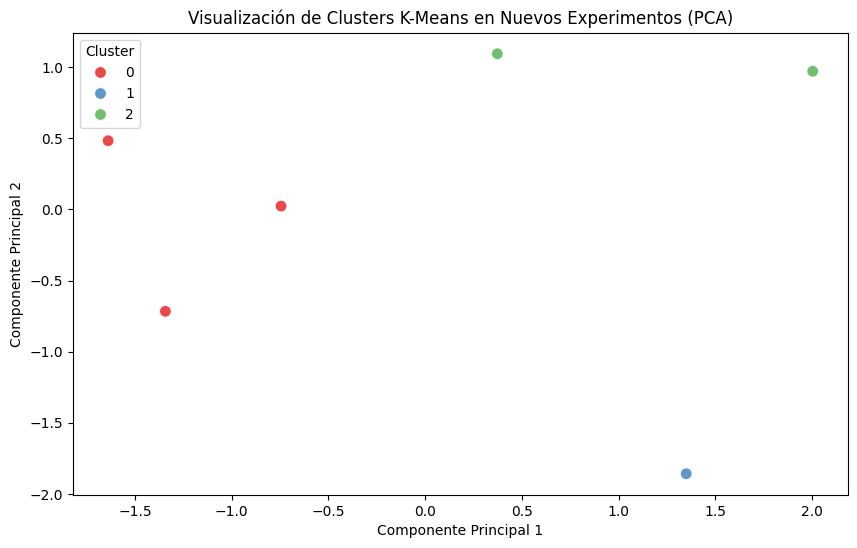

In [22]:
# Reducir los datos a 2D con PCA
pca = PCA(n_components=2)
reduced_data_new = pca.fit_transform(X_new_scaled)

# Crear un DataFrame con los datos reducidos y los clusters
plot_data = pd.DataFrame(reduced_data_new, columns=["Componente 1", "Componente 2"])
plot_data["Cluster"] = new_experiments["KMeans_Cluster"]

# Graficar los clusters en 2D
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="Componente 1", y="Componente 2", hue="Cluster", palette="Set1", data=plot_data, s=70, alpha=0.8
)

# Ajustar la visualización
plt.title("Visualización de Clusters K-Means en Nuevos Experimentos (PCA)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Cluster", loc="best")
plt.grid(False)
plt.show()

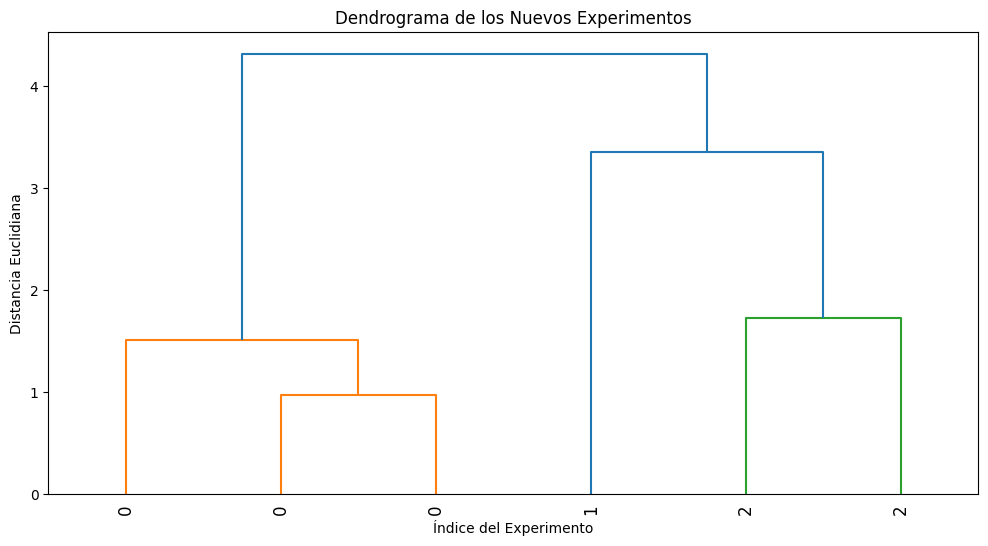

In [21]:
# Calcular el linkage (enlace jerárquico) para el dendrograma
linkage_matrix = sch.linkage(X_new_scaled, method="ward")

# Graficar el dendrograma
plt.figure(figsize=(12, 6))
sch.dendrogram(linkage_matrix, labels=new_experiments["KMeans_Cluster"].values, leaf_rotation=90)
plt.title("Dendrograma de los Nuevos Experimentos")
plt.xlabel("Índice del Experimento")
plt.ylabel("Distancia Euclidiana")
plt.grid(False)
plt.show()

### Parte III. EXTRA (Voluntario): 6 meses después...

La unidad de experimentación recibió un presupuesto adicional gracias a los modelos que les proporcionastes e hizo pruebas con cliente y obtuvo resultados como para clasificar cada bebida en terminos de "energización" en tres niveles (1, media; 2, media-alta, 3, alta). El resultado de los mismos está en el fichero adecuado en el directorio data y alineado con los experimentos iniciales y al final con los nuevos experimentos de la parte anterior.

Evalua la segmentación de los modelos creados en la primera parte.